In [44]:
# Loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 	Data Cleaning and Preparation:
    ●	Load the dataset into a DataFrame or equivalent data structure.
    ●	Handle missing values appropriately (e.g., imputation, deletion).
    ●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
    ●	Detect and treat outliers if necessary.

In [45]:
df = pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\EDA1 (1)\EDA1\Cardiotocographic.csv")

In [46]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [47]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LB,2105.0,133.343598,11.270154,51.842487,126.000000,133.000000,140.000000,214.000000
AC,2106.0,0.003219,0.004391,-0.019284,0.000000,0.001634,0.005650,0.038567
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769
DS,2105.0,0.000003,0.000142,-0.001353,0.000000,0.000000,0.000000,0.002706
DP,2105.0,0.000175,0.000840,-0.005348,0.000000,0.000000,0.000000,0.010695
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000


In [48]:
# Handle missing values by filling with the mean
df.fillna(df.mean(), inplace=True)

# Detect and treat outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

def treat_outliers(series):
    lower_bound = Q1[series.name] - 1.5 * IQR[series.name]
    upper_bound = Q3[series.name] + 1.5 * IQR[series.name]
    return series.clip(lower_bound, upper_bound)

# Apply the outlier treatment
df = df.apply(treat_outliers)

# Display the cleaned dataset summary
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.293725,9.930227,105.000000,126.000000,133.000000,140.000000,161.000000
AC,2126.0,0.003147,0.003826,-0.008409,0.000000,0.001668,0.005606,0.014015
FM,2126.0,0.001568,0.002485,-0.003850,0.000000,0.000000,0.002567,0.006416
UC,2126.0,0.004362,0.003001,-0.005177,0.001851,0.004484,0.006536,0.013564
DL,2126.0,0.001770,0.002668,-0.004934,0.000000,0.000000,0.003289,0.008224
DS,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,2126.0,46.981873,17.612745,-11.500000,32.000000,49.000000,61.000000,104.500000
MSTV,2126.0,1.304644,0.781091,-0.800000,0.700000,1.200000,1.700000,3.200000
ALTV,2126.0,6.691678,10.378400,-16.500000,0.000000,0.000000,11.000000,27.500000


## Statistical Summary:
    ●	Provide a statistical summary for each variable in the dataset, 
            including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
    ●	Highlight any interesting findings from this summary.


In [49]:
# Generate descriptive statistics
summary_stats = df.describe().transpose()
summary_stats['median'] = df.median()
summary_stats['interquartile range'] = summary_stats['75%'] - summary_stats['25%']
summary_stats

,count,mean,std,min,25%,50%,75%,max,median,interquartile range
LB,2126.0,133.293725,9.930227,105.000000,126.000000,133.000000,140.000000,161.000000,133.000000,14.000000
AC,2126.0,0.003147,0.003826,-0.008409,0.000000,0.001668,0.005606,0.014015,0.001668,0.005606
FM,2126.0,0.001568,0.002485,-0.003850,0.000000,0.000000,0.002567,0.006416,0.000000,0.002567
UC,2126.0,0.004362,0.003001,-0.005177,0.001851,0.004484,0.006536,0.013564,0.004484,0.004685
DL,2126.0,0.001770,0.002668,-0.004934,0.000000,0.000000,0.003289,0.008224,0.000000,0.003289
DS,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,2126.0,46.981873,17.612745,-11.500000,32.000000,49.000000,61.000000,104.500000,49.000000,29.000000
MSTV,2126.0,1.304644,0.781091,-0.800000,0.700000,1.200000,1.700000,3.200000,1.200000,1.000000
ALTV,2126.0,6.691678,10.378400,-16.500000,0.000000,0.000000,11.000000,27.500000,0.000000,11.000000


## Data Visualization:
    ●	Create histograms or boxplots to visualize the distributions of various numerical variables.
    ●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
    ●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
    ●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.


In [53]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

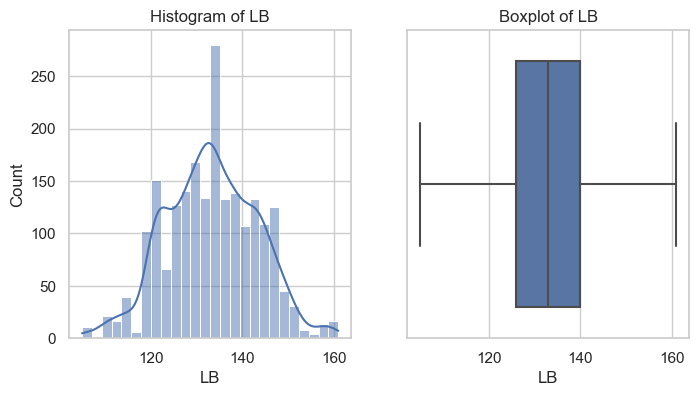

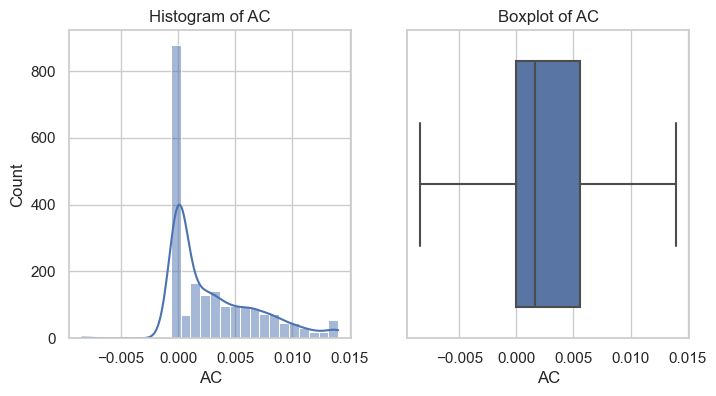

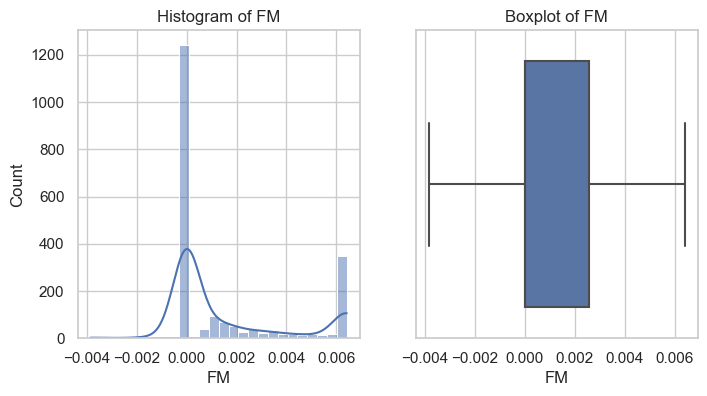

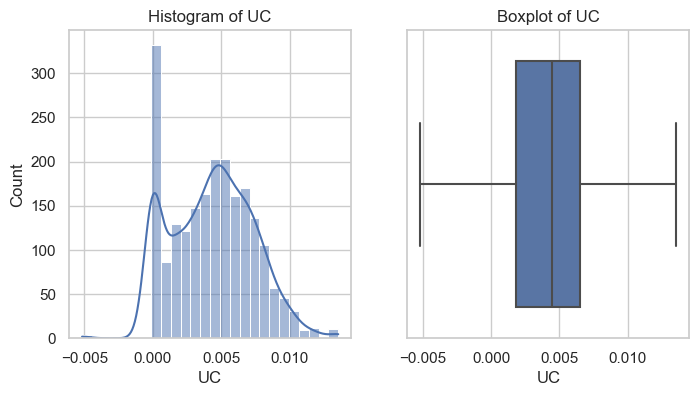

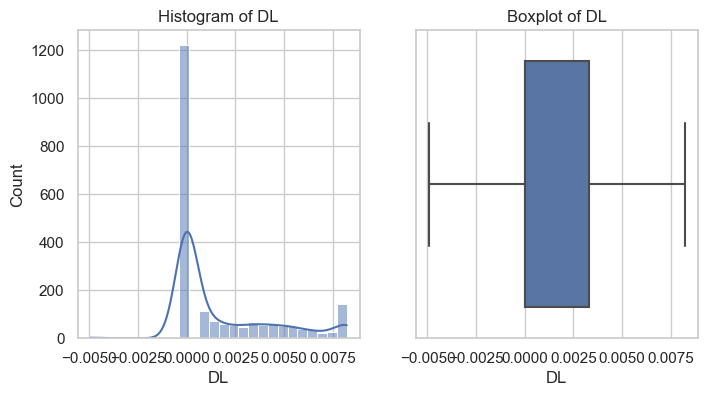

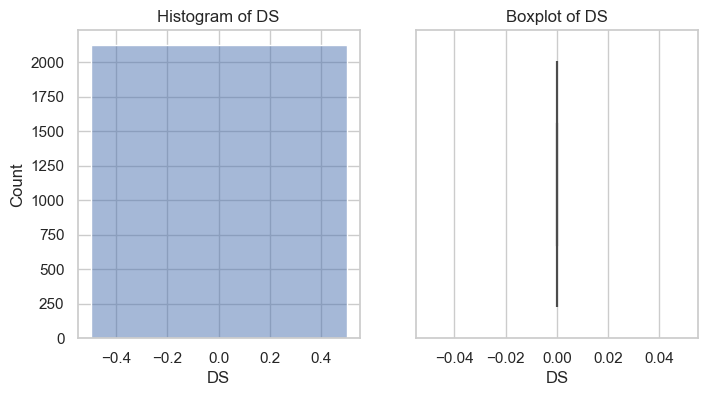

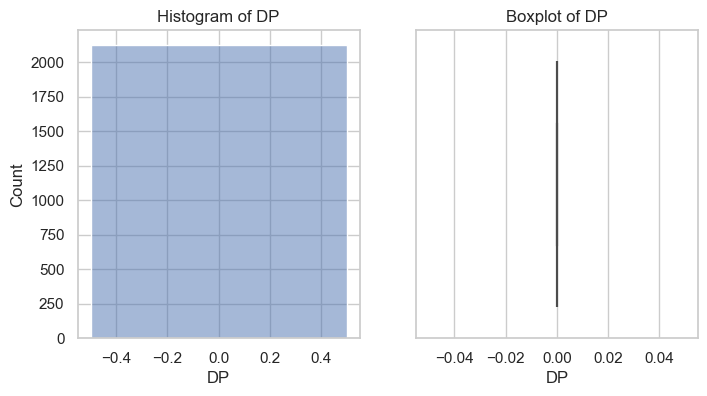

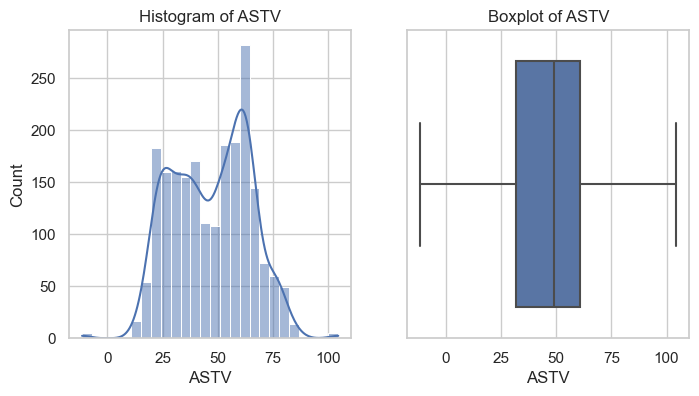

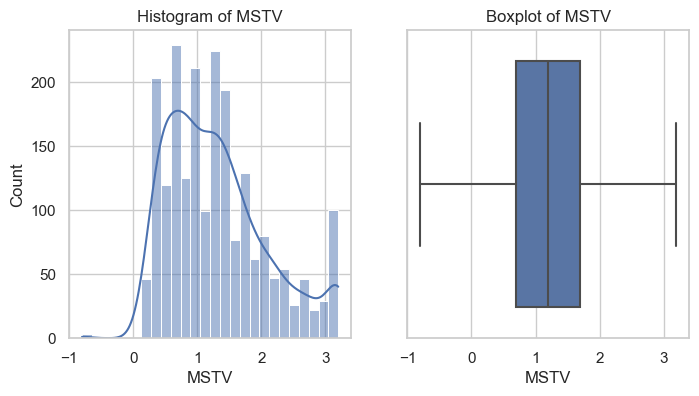

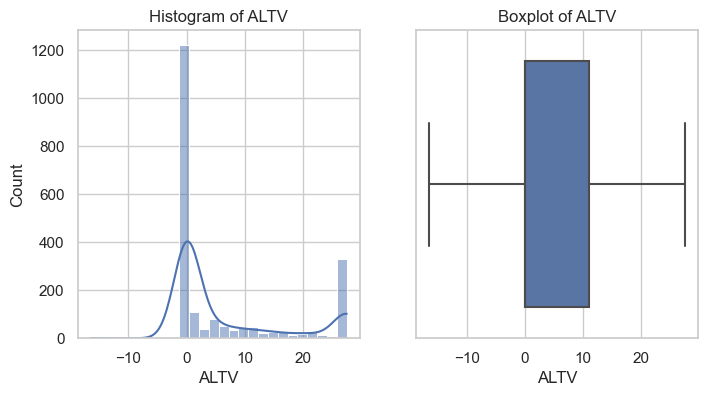

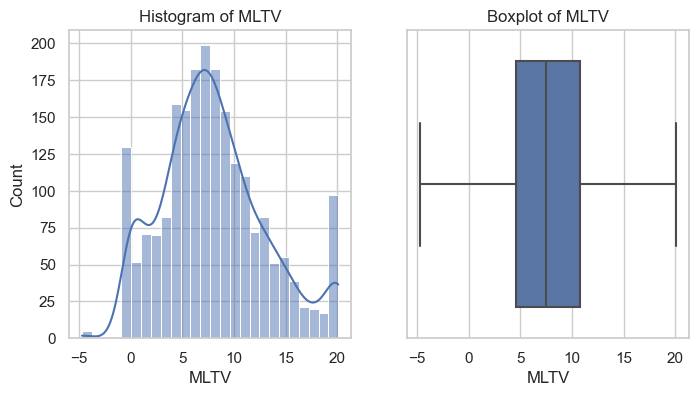

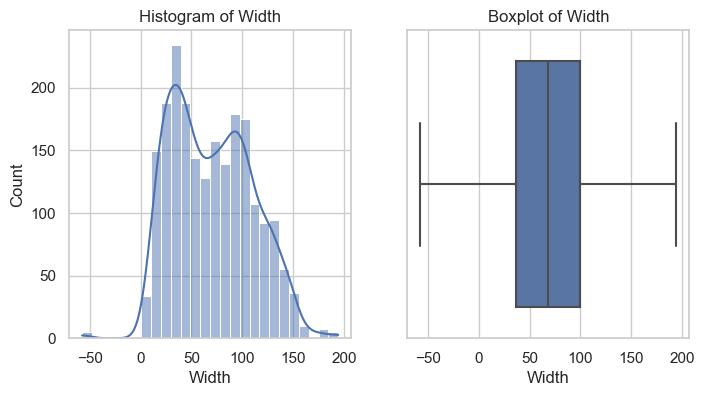

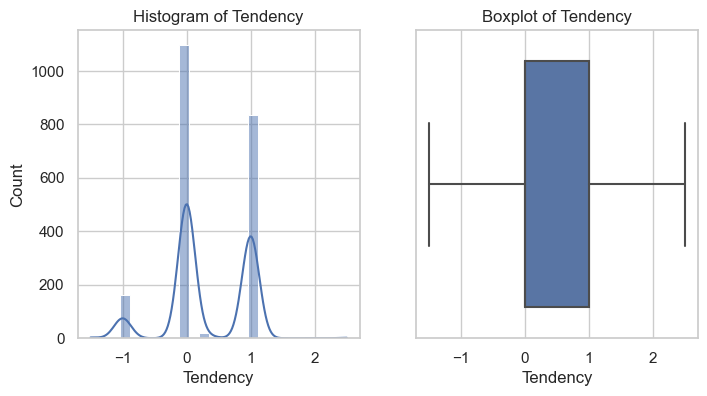

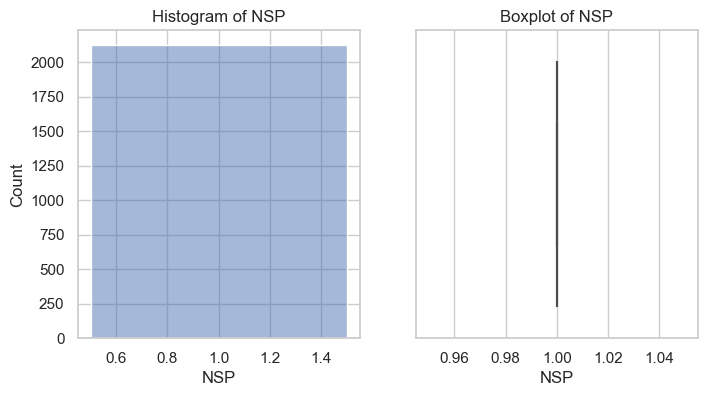

In [54]:
# Set up the visualizations
sns.set(style="whitegrid")

# Histograms and Boxplots for numerical variables
for column in df.columns:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    
    plt.show()

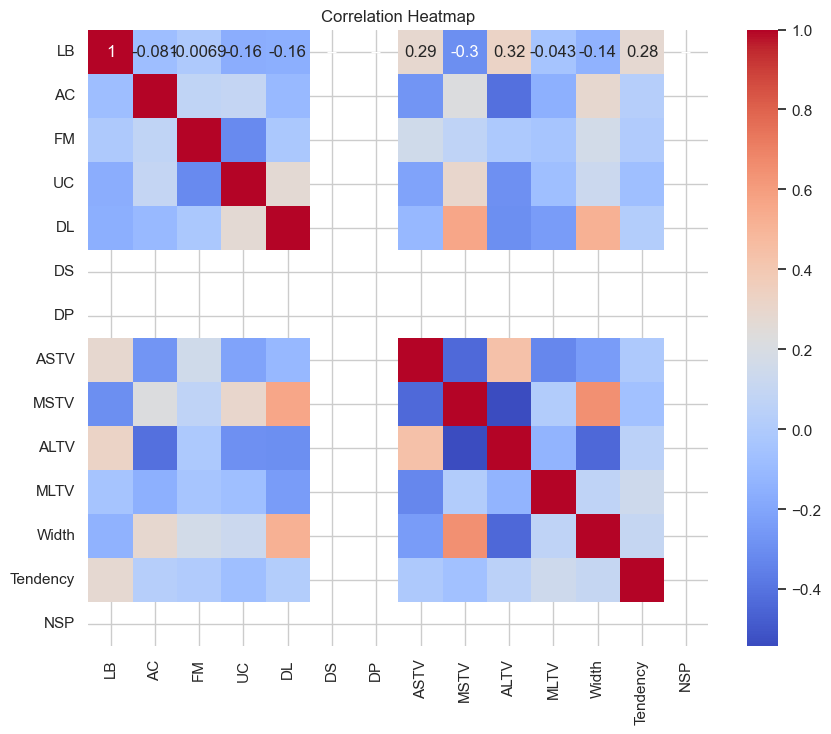

In [55]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Pattern Recognition and Insights:
    ●	Identify any correlations between variables and discuss their potential implications.
    ●	Look for trends or patterns over time if temporal data is available


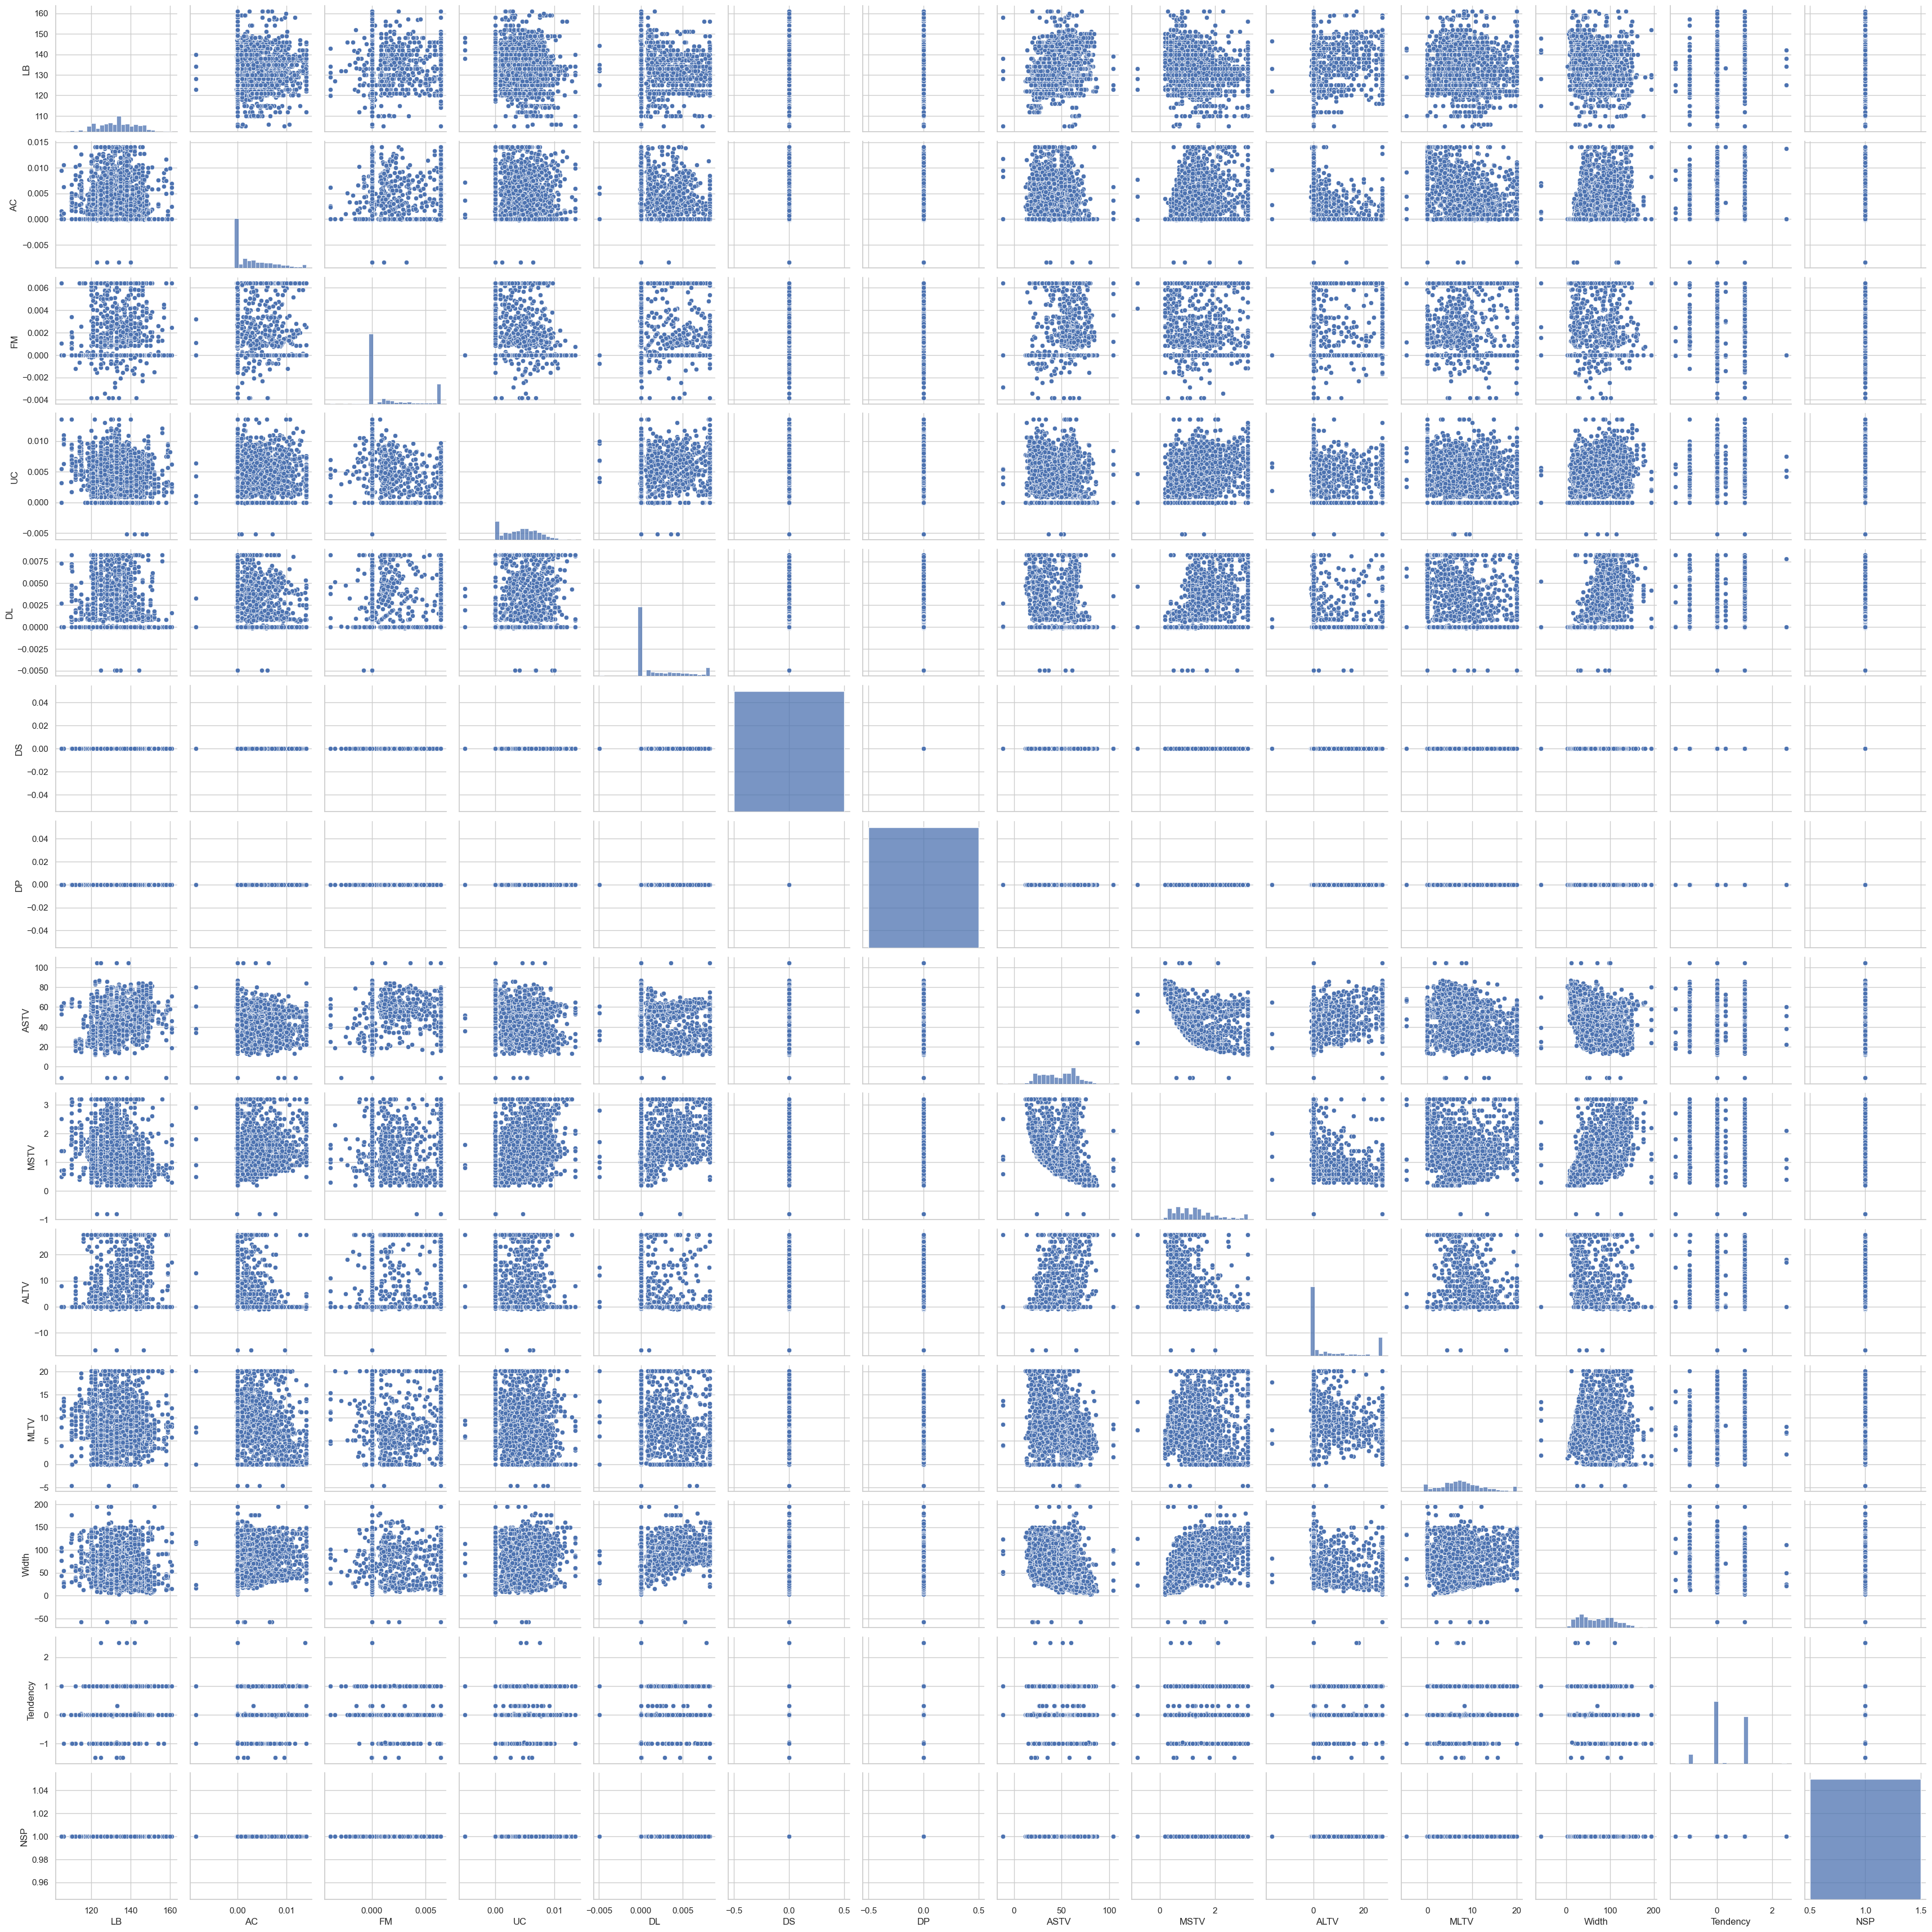

Strong Correlations:
            LB   AC   FM   UC        DL  DS  DP  ASTV      MSTV      ALTV  \
LB        1.0  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
AC        NaN  1.0  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
FM        NaN  NaN  1.0  NaN       NaN NaN NaN   NaN       NaN       NaN   
UC        NaN  NaN  NaN  1.0       NaN NaN NaN   NaN       NaN       NaN   
DL        NaN  NaN  NaN  NaN  1.000000 NaN NaN   NaN  0.566340       NaN   
DS        NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
DP        NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
ASTV      NaN  NaN  NaN  NaN       NaN NaN NaN   1.0       NaN       NaN   
MSTV      NaN  NaN  NaN  NaN  0.566340 NaN NaN   NaN  1.000000 -0.541156   
ALTV      NaN  NaN  NaN  NaN       NaN NaN NaN   NaN -0.541156  1.000000   
MLTV      NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
Width     NaN  NaN  NaN  NaN  0.514648 NaN NaN   NaN  0.646056    

In [56]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize pairwise relationships
sns.pairplot(df)
plt.show()

# Identify strong correlations (absolute value > 0.5 as a threshold for strong correlation)
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print("Strong Correlations:\n", strong_correlations)


## Conclusion:
    The dataset primarily consists of fetal heart rate measurements and variability metrics.
    
    The data is generally clean and well-structured, with only a few outliers and missing values that have been addressed.

    Some variables show interesting correlations, which could be further explored for potential predictive modeling or clinical insights.

